<a href="https://colab.research.google.com/github/alfredbalami/alfredbalami/blob/main/Pandas_Rough_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Impporting Libraries
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_datareader as pdr
import datetime as dt

In [2]:
# Resampling Example
index=pd.date_range(start="01/10/2022", periods=100, freq='T')
df = pd.DataFrame(data=range(100), index=index, columns=["count"])
df.head()

,count
2022-01-10 00:00:00,0
2022-01-10 00:01:00,1
2022-01-10 00:02:00,2
2022-01-10 00:03:00,3
2022-01-10 00:04:00,4


In [3]:
contacts = pd.read_csv("/content/drive/MyDrive/Contacts/contacts_031122.csv")
contacts.columns

Index(['Name', 'Given Name', 'Additional Name', 'Family Name', 'Yomi Name',
       'Given Name Yomi', 'Additional Name Yomi', 'Family Name Yomi',
       'Name Prefix', 'Name Suffix', 'Initials', 'Nickname', 'Short Name',
       'Maiden Name', 'Birthday', 'Gender', 'Location', 'Billing Information',
       'Directory Server', 'Mileage', 'Occupation', 'Hobby', 'Sensitivity',
       'Priority', 'Subject', 'Notes', 'Language', 'Photo', 'Group Membership',
       'E-mail 1 - Type', 'E-mail 1 - Value', 'E-mail 2 - Type',
       'E-mail 2 - Value', 'E-mail 3 - Type', 'E-mail 3 - Value',
       'E-mail 4 - Type', 'E-mail 4 - Value', 'Phone 1 - Type',
       'Phone 1 - Value', 'Phone 2 - Type', 'Phone 2 - Value',
       'Phone 3 - Type', 'Phone 3 - Value', 'Phone 4 - Type',
       'Phone 4 - Value', 'Phone 5 - Type', 'Phone 5 - Value',
       'Phone 6 - Type', 'Phone 6 - Value', 'Phone 7 - Type',
       'Phone 7 - Value', 'Address 1 - Type', 'Address 1 - Formatted',
       'Address 1 - Street',

In [4]:
LOR = 10*230*0.001*0.8*0.6*18*30*50*6*1.075
print(f'₦{LOR:,.2f}')

₦192,261.60


### Generating Data and manupulating it.

In [5]:
w = random.sample(range(50), 10)
x = random.sample(range(50), 10)
y = random.sample(range(50), 10)
z = random.sample(range(50), 10)
ind = ["one", "two", "three","four", "five", "six", "seven", "eight", "nine", "ten"]

In [6]:
df = pd.DataFrame({"w": w, "x": x, "y": y, "z": z}, index=ind)
df

,w,x,y,z
one,39,43,32,15
two,37,28,40,13
three,43,15,49,21
four,7,46,20,3
five,45,11,8,34
six,31,32,10,35
seven,34,6,1,23
eight,18,9,3,40
nine,46,20,30,9
ten,29,7,19,46


In [7]:
df.sum(axis = 1)

one      129
two      118
three    128
four      76
five      98
six      108
seven     64
eight     70
nine     105
ten      101
dtype: int64

In [8]:
df.sum(axis = 0)

w    329
x    217
y    212
z    239
dtype: int64

In [9]:
df.head()

,w,x,y,z
one,39,43,32,15
two,37,28,40,13
three,43,15,49,21
four,7,46,20,3
five,45,11,8,34


In [10]:
df.drop(index =["one", "two"])

,w,x,y,z
three,43,15,49,21
four,7,46,20,3
five,45,11,8,34
six,31,32,10,35
seven,34,6,1,23
eight,18,9,3,40
nine,46,20,30,9
ten,29,7,19,46


In [11]:
df.drop(index = ["ten", "nine", "eight"], columns=["y", "z"])

,w,x
one,39,43
two,37,28
three,43,15
four,7,46
five,45,11
six,31,32
seven,34,6


In [12]:
df

,w,x,y,z
one,39,43,32,15
two,37,28,40,13
three,43,15,49,21
four,7,46,20,3
five,45,11,8,34
six,31,32,10,35
seven,34,6,1,23
eight,18,9,3,40
nine,46,20,30,9
ten,29,7,19,46


In [13]:
(df - df.mean())/df.std()

,w,x,y,z
one,0.491392,1.437462,0.666154,-0.622633
two,0.330280,0.425165,1.159601,-0.762551
three,0.813617,-0.452159,1.714729,-0.202880
four,-2.086404,1.639922,-0.074017,-1.462138
five,0.974729,-0.722105,-0.814188,0.706584
six,-0.153057,0.695111,-0.690826,0.776542
seven,0.088612,-1.059538,-1.245954,-0.062963
eight,-1.200287,-0.857078,-1.122592,1.126336
nine,1.055286,-0.114727,0.542792,-1.042386
ten,-0.314169,-0.992051,-0.135698,1.546089


In [14]:
df.loc[["five", "six", "seven"], ["x", "y"]].eval("x_sq=x**2").eval("y_sq=y**2")

,x,y,x_sq,y_sq
five,11,8,121,64
six,32,10,1024,100
seven,6,1,36,1


In [15]:
df.loc[["five", "six", "seven"], ["x", "y"]]

,x,y
five,11,8
six,32,10
seven,6,1


In [16]:
df.filter(["x", "y"])

,x,y
one,43,32
two,28,40
three,15,49
four,46,20
five,11,8
six,32,10
seven,6,1
eight,9,3
nine,20,30
ten,7,19


In [17]:
df.eval('sum = x + y')

,w,x,y,z,sum
one,39,43,32,15,75
two,37,28,40,13,68
three,43,15,49,21,64
four,7,46,20,3,66
five,45,11,8,34,19
six,31,32,10,35,42
seven,34,6,1,23,7
eight,18,9,3,40,12
nine,46,20,30,9,50
ten,29,7,19,46,26


In [18]:
df.eval("total = w+x+y+z")

,w,x,y,z,total
one,39,43,32,15,129
two,37,28,40,13,118
three,43,15,49,21,128
four,7,46,20,3,76
five,45,11,8,34,98
six,31,32,10,35,108
seven,34,6,1,23,64
eight,18,9,3,40,70
nine,46,20,30,9,105
ten,29,7,19,46,101


In [19]:
mask = df.eval("x > 30 & y < 200")
df[mask]


,w,x,y,z
one,39,43,32,15
four,7,46,20,3
six,31,32,10,35


In [20]:
df.eval("p = (w + x) / (y + z)", inplace=True)
df

,w,x,y,z,p
one,39,43,32,15,1.744681
two,37,28,40,13,1.226415
three,43,15,49,21,0.828571
four,7,46,20,3,2.304348
five,45,11,8,34,1.333333
six,31,32,10,35,1.400000
seven,34,6,1,23,1.666667
eight,18,9,3,40,0.627907
nine,46,20,30,9,1.692308
ten,29,7,19,46,0.553846


In [21]:
w_mean = df['w'].mean()
df.eval("w_plus_wmean = w + @w_mean", inplace=True)
df

,w,x,y,z,p,w_plus_wmean
one,39,43,32,15,1.744681,71.9
two,37,28,40,13,1.226415,69.9
three,43,15,49,21,0.828571,75.9
four,7,46,20,3,2.304348,39.9
five,45,11,8,34,1.333333,77.9
six,31,32,10,35,1.400000,63.9
seven,34,6,1,23,1.666667,66.9
eight,18,9,3,40,0.627907,50.9
nine,46,20,30,9,1.692308,78.9
ten,29,7,19,46,0.553846,61.9


In [22]:
df.eval("x_plus_xmean = x + x.mean()", inplace=True)
df

,w,x,y,z,p,w_plus_wmean,x_plus_xmean
one,39,43,32,15,1.744681,71.9,64.7
two,37,28,40,13,1.226415,69.9,49.7
three,43,15,49,21,0.828571,75.9,36.7
four,7,46,20,3,2.304348,39.9,67.7
five,45,11,8,34,1.333333,77.9,32.7
six,31,32,10,35,1.400000,63.9,53.7
seven,34,6,1,23,1.666667,66.9,27.7
eight,18,9,3,40,0.627907,50.9,30.7
nine,46,20,30,9,1.692308,78.9,41.7
ten,29,7,19,46,0.553846,61.9,28.7


In [23]:
df = df.eval("cube_y = y**3").style.format("{:,.2f}")

In [24]:
df

,w,x,y,z,p,w_plus_wmean,x_plus_xmean,cube_y
one,39.00,43.00,32.00,15.00,1.74,71.90,64.70,"32,768.00"
two,37.00,28.00,40.00,13.00,1.23,69.90,49.70,"64,000.00"
three,43.00,15.00,49.00,21.00,0.83,75.90,36.70,"117,649.00"
four,7.00,46.00,20.00,3.00,2.30,39.90,67.70,"8,000.00"
five,45.00,11.00,8.00,34.00,1.33,77.90,32.70,512.00
six,31.00,32.00,10.00,35.00,1.40,63.90,53.70,"1,000.00"
seven,34.00,6.00,1.00,23.00,1.67,66.90,27.70,1.00
eight,18.00,9.00,3.00,40.00,0.63,50.90,30.70,27.00
nine,46.00,20.00,30.00,9.00,1.69,78.90,41.70,"27,000.00"
ten,29.00,7.00,19.00,46.00,0.55,61.90,28.70,"6,859.00"


In [ ]:
df.info

In [ ]:
df.drop_duplicates(keep="first", subset=["x", "y"], inplace=True)
df

In [ ]:
df.loc[["one"], :]

In [ ]:
df.query("x==307")

In [ ]:
df.filter(["x", "y"]).query("x <= 150")

In [ ]:
df.query("x**2 - 5*x + 6 < 500")

In [ ]:
df.query("x==40 | y == 36").filter(["x", "z"])

In [ ]:
df.filter(["x", "y"]).query("x < 20 & y > 10")

In [ ]:
#@title Read Crypto
# Import libraries
import json
import requests

# defining key/request url
key = "https://api.binance.com/api/v3/ticker/price?symbol=BTCUSDT"

# requesting data from url
data = requests.get(key)
data = data.json()
# print(f"{data['symbol']} price is {data['price']}")
data

In [28]:
#@title Read Stocks Price
ticker = "TSLA"
start = dt.datetime(2022, 10, 1)
data = pdr.get_data_stooq(ticker, start)
data.head()
data.shape

(287, 5)

In [30]:
data.sum(axis=0)

Open      5.993332e+04
High      6.122472e+04
Low       5.853999e+04
Close     5.991794e+04
Volume    3.790195e+10
dtype: float64

In [29]:
nasdaq_sym = pdr.get_nasdaq_symbols()
nasdaq_sym.head(3)

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Investment Managers Series Trust II AXS First ...,P,,True,100.0,False,NaN,AAA,AAA,False


In [32]:
# ! jupyter nbconvert --to html /content/drive/MyDrive/Colab Notebooks/Big_Data_Assignment.ipynb

In [ ]:
!pip install nbconvert
jupyter nbconvert --to pdf /content/drive/MyDrive/Colab Notebooks/Big_Data_Assignment.ipynb

In [33]:
import pandas as pd
import random

In [2]:
primes = []
n = range(1000_000)
for i in n:
    if i % 7 == 0:
        primes.append(i)
    else:
        pass
print(primes[0:5])

[0, 7, 14, 21, 28]


# Symbolic Computation in Python

In [19]:
import math
math.sqrt(9)
3.0

3.0

In [20]:
math.sqrt(8)

2.8284271247461903

In [21]:
import sympy
sympy.sqrt(3)

sqrt(3)

In [22]:
sympy.sqrt(8)

2*sqrt(2)

In [23]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr
x + 2*y

x + 2*y

In [24]:
x*expr

x*(x + 2*y)

In [25]:
from sympy import *
x, t, z, nu = symbols('x t z nu')

In [26]:
a, b, c = symbols("a, b, c")
(-b+sqrt(b**2-4*a*c))/(2*a)

(-b + sqrt(-4*a*c + b**2))/(2*a)

In [27]:
#@title This will make all further examples pretty print with unicode characters.
init_printing(use_unicode=True)

In [28]:
f = x**4 - 5*x**3 + 6*x**2 - 3*x + 10
f

 4      3      2           
x  - 5⋅x  + 6⋅x  - 3⋅x + 10

In [29]:
diff(f, x)

   3       2           
4⋅x  - 15⋅x  + 12⋅x - 3

In [30]:
g = diff(f, x)

In [31]:
integrate(g, x)

 4      3      2      
x  - 5⋅x  + 6⋅x  - 3⋅x

In [32]:
y = sin(x)*exp(x)
y

 x       
ℯ ⋅sin(x)

In [33]:
diff(y, x)

 x           x       
ℯ ⋅sin(x) + ℯ ⋅cos(x)

In [34]:
z = exp(x)*sin(x) + exp(x)*cos(x)
z

 x           x       
ℯ ⋅sin(x) + ℯ ⋅cos(x)

In [35]:
integrate(z, x)

 x       
ℯ ⋅sin(x)

In [36]:
8**(-2/3)

0.25

In [37]:
Eq(x + 1, 4)

x + 1 = 4

In [38]:
Eq((x + 1)**2, x**2 + 2*x + 1)

       2    2          
(x + 1)  = x  + 2⋅x + 1

In [39]:
pi.evalf(10)


3.141592654

In [40]:
Eq(sin(x)**2 + cos(x)**2, 1)

   2         2       
sin (x) + cos (x) = 1

In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.DataFrame()
size = 100_000
df['age'] = np.random.randint(0, 100, size)
df['time_in_bed'] = np.random.randint(0, 9, size)
df['pct_sleep'] = np.random.rand(size)*100
df['favorite_food'] = np.random.choice(['rice', 'beans', 'yam'], size)
df['hated_food'] = np.random.choice(['egusi', 'bread', 'goat head'], size)

In [43]:
df

,age,time_in_bed,pct_sleep,favorite_food,hated_food
0,20,3,25.988291,beans,bread
1,50,6,30.591319,rice,egusi
2,23,8,54.530068,beans,goat head
3,7,0,67.375821,yam,bread
4,37,8,24.650213,rice,egusi
...,...,...,...,...,...
99995,5,2,91.299013,rice,goat head
99996,10,1,14.155106,yam,bread
99997,1,6,11.090319,beans,bread
99998,91,2,85.352301,beans,goat head


<Axes: >

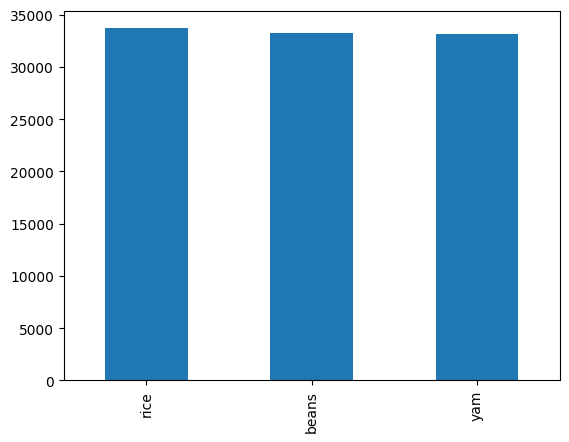

In [44]:
df['favorite_food'].value_counts().plot(kind="bar")

<Axes: >

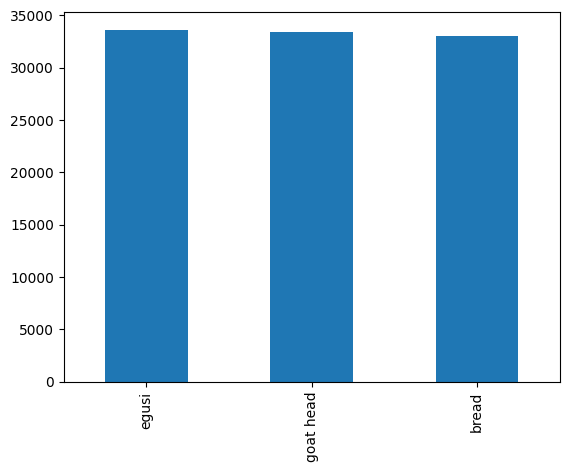

In [45]:
df["hated_food"].value_counts().plot(kind="bar")

Generate Random Data

In [46]:
import pandas as pd
import numpy as np
import random

In [47]:

area = ["Kakuri", "Television", "Romi", "Goni Gora", "Kudendan", "Nasarawa"]
area_office = ["Makera AO", "Barnawa AO", "Doka AO"]
feeder = ["11KV FEDERAL HOUSING", "11KV CHELLCO", "11KV KAKURI", "11KV UNGUWAN YELWA", "33KV GONI GORA", "33KV PAN"]
tariff = ["R2-SP", "R2-TP", "R1", "C1", "D1", "A1"]
tariffband = ["A - NMD", "B - NMD", "C - NMD", "E - NMD"]
names = ['Nanchak', 'Ponjul',
'Ogala', 'Jessica', 'Ejima',
'Hussaini', 'Ameenah', 'Oyiza',
'Auwal', 'Siddiq',
'Suleiman', 'Auwal',
'Abdullahi', 'Idris', 'Babankogi',
'Bello', 'Jamil',
'Edebi', 'Binta', 'Rose',
'Demebide', 'Master', 'Tony',
'Muhammad', 'Ibrahim', 'Baffa',
'Adam', 'Bello', 'Kaya',
'Aliyu', 'Khadija',
'Babslawal', 'Abdulateef', 'Ayodeji',
'Muktar', 'Ahmad', 'Nazifi',
'Dike', 'Chika',
'Bello', 'Yahaya', 'Murshadi',
'Olayiwola', 'Ayoola', 'Richard',
'Adebayo', 'Sola', 'Isola',
'Sabo', 'Suleiman',
'Hassan', 'Ezekiel',
'Hassan', 'Adamu', 'Zoaka',
'Lambert', 'Dafom', 'Nuhu',
'Murtala', 'Ummi', 'Hajara',
'Maigari', 'Yunana', 'Jeremiah',
'Kwasau', 'Samaila',
'Yahaya', 'Shamsudeen',
'Hassan', 'Shaibatu', 'Ibrahim',
'Datti', 'Amin', 'Bashir',
'Ogweda', 'Suleman', 'Haruna',
'Isiaka', 'Isah',
'Zamani', 'Moses', 'Avong',
'Ahmed', 'Salisu', 'Mohammed',
'Dangana', 'Martin',
'Ubaka', 'Igweze',
'Egere', 'Seromome', 'Leonard',
'Muazu', 'Bello', 'Hadiza',
'Wellington', 'Tammy', 'Iboma',
'Ohiare', 'Zullaihat',
'Shuaibu', 'Shuaib', 'Ishaq',
'Muhammad', 'Abubakar',
'Usman', 'Juwairiyyah',
'Agir', 'Sesugh', 'Solomon',
'Nwokoye', 'Chinelo',
'Haruna', 'Sule', 'Kukum',
'Nwokeji', 'Ifeanyi', 'Onyedikachi',
'Gisilanbe', "Sa'Adatu", 'Musa',
'Anden', 'Margarita', 'Shalwan',
'Ahmed', 'Madynah', 'Abdulkadir',
'Elisha', 'Christiana',
'Joshua', 'Yusuf',
'Akpan', 'Christian', 'Gabriel',
'Brig', 'Gen', 'Francis',
'Aliyu', 'Aliyu',
'Levi', 'Ephraim',
'Johnbull', 'Gift',
'Aliyu', 'Yusuf', 'Mohammed',
'Muhammad', 'Abdulrahman',
'Aliyu', 'Sumayya', 'Ikra',
'Abdullahi', 'Badamasi',
'Uche', 'Emmanuel',
'James', 'Olabamidele', 'Emmanuel',
'Samson', 'Jemima', 'Favour',
'Akumadu', 'Harrison',
'Mohammed', 'Usman',
"Mu'Azu", 'Mohammed', "Mu'Azu",
'Shuaibu', 'Zulaiha', 'Atti',
'Usman', 'Amina', 'Idris',
'Sani', 'Ndamodu', 'Abubakar',
'Dibal', 'Sunday', 'Daniel',
'Aliyu', 'Fatima', 'Kamdo',
'Ali', 'Abdukadir',
'Yusrah', 'Muhammad', 'Attahiru',
'Waniko', 'Abraham',
'Takai', 'Gideon', 'Abagai',
'Nder', 'Aii', 'Luper',
'Nura', 'Hayatu',
'Ibrahim', 'Midala',
'Hussaini', 'Ameenah', 'Oyiza',
'Batruak', 'Kanchok', 'Kwasu',
'Shehu', 'Alima', 'Garba',
'Mohammed', 'Fawziyyah',
'Dogo', 'Malani', 'Ruth',
'Anka', 'Bulus', 'Habu',
'Muhammed', 'Maryam', 'Suleiman',
'Abdullahi', 'Mohammed',
'Kasar', 'Moses', 'Teryima',
'Edennamani', 'Maduka,', 'Mathias',
'Sani', 'Zaharaddeen', 'Muhammad',
'Umar', 'Hannatu',
'Shosimi', 'Israel',
'Wetle', 'Jjoseph', 'Rinret',
'Albasu', 'Abubakar', 'Tijjani',
'Abdullahi', 'Chonoko', 'Sadiya',
'Kachalla', 'Yarima', 'Muhammad',
'Liman', 'Abdullateef',
'Ogbewele', 'Judith',
'Abubakar', 'Jimbarima', 'Umar',
'Muhammed', 'Shafiu', 'Maryam',
'Dunah', 'Jeremiah', 'John',
'Sani', 'Muhammad', 'Ghaddafi',
'Dangana', 'Ladi',
'Jonathan', 'Yaska', 'Favour',
'Isu', 'Anyebe', 'Lucy',
'Aminu', 'Samira', 'Awazi',
'David', 'Jesse',
'Usman', 'Aisha',
'Onu', 'Udeh', 'Nneka',
'Babafada', 'Hadiza',
'Wazimtu', 'Michael',
'Isyaku', 'Audu', 'Hassan',
'Babafada', 'Maryam',
'Mohammed', 'Ibrahim', 'Aliyu',
'Kwanye', 'Lami', 'Ogirima',
'Anavhe', 'Mercy', 'Anino',
'Peter', 'Martha',
'Muhammad', 'Nafisat', 'Hassan',
'Kure', 'Eunice',
'Nwaedozie', 'Helen',
'Abdullahi', 'Halima', 'Folashade',
'Ishom', 'Mirian', 'Kpadoo',
'Mosugu', 'Peter',
'Mbaba', 'Success', 'Awele',
'Mohammed', 'Jacinta', 'Aisha',
'Juliana', 'Ommi',
'Bayei', 'Zipporah',
'Bakut', 'Solomon',
'Adeoye', 'Adewumi',
'Bakori', 'Maryam', 'Ibrahim',
'Maidala', 'Hauwa',
'Yunusa', 'Ubaidu',
'Shafiyi', 'Umar', 'Imam',
'Muhammed', 'Aliyu',
'Waya', 'Sudan', 'Aishatu',
'Jibril', 'Aliyu',
'Ameh', 'Friday', 'Idoko',
'Oluchi', 'Unanka', 'Oguh',
'Yazid', 'Fatima',
'Christopher', 'Charity', 'Kangnaan',
'Abdullahi', 'Gumi', 'Nuruddeen',
'Olamide', 'Success', 'Samuel-Obagunlu',
'Gambo', 'Suleiman', 'Ibrahim',
'Williams', 'Forsan', 'Jennifer',
'Clement', 'Bonaventure', 'Bolaji',
'Igere', 'Edafe',
'Mustapha', 'Mohammed',
'Muhammad', 'Nura',
'Caleb', 'Ityarmem', 'Abagyeh',
'Manga', 'Maryam',
'Zome', 'Bathsheba',
'Zome', 'Amina',
'Clement', 'Bonaventure', 'Bolaji',
'Ahmed', 'Bello',
'Matoh', 'Malihatu', 'Bashir',
'Ameshi', 'Chijioke',
'Salihu', 'Umaamah',
'Ibrahim', 'Hafsat',
'Ameh', 'Anthonia',
'Suleiman', 'Yasir', 'Paris',
'Usa', 'William',
'Amuku', 'Olorunfemi', 'Philips',
'Maaji', 'Musa', 'Suleiman',
'Ibrahim', 'Muhammad', 'Salisu',
'Agwason', 'Galadima', 'Williams',
'Wagio', 'Daneke', 'Joshua',
'Ali', 'Baba', 'Abdullahi',
'Wuyangbo', 'Edward', 'Musa',
'Musa', 'Sarki', 'Musa',
'Idoko', 'Marshal',
'Chukwuzoba', 'Obinna',
'Onyeze', 'Chimezie',
'Ahmad', 'Bayero', 'Abdullahi',
'Mohammed', 'Lamis', 'Danjuma',
'Mohammed', 'Abdulhakeem', 'Mansur',
'Kainu', 'Adah', 'Christiana',
'Pam', 'Kachollom', 'Thelma',
'Yusuf', 'Abeedat',
'Olatunde', 'Babafemi',
'Galadima', 'Ameer', 'Umar',
'Hassan', 'Ishaku', 'Mshelia',
'Aliyu', 'Datsama', 'Habiba',
'Mohammed', 'Fatima', 'Ibrahim',
'Dahiru', 'Talatu',
'Chrisangelus', 'Abu',
'Ofoni', 'Mathew', 'Avwerute',
'Abu', 'Abubakar', 'Umar',
'Omole', 'Nwanneamaka', 'Kendra',
'Abubakar', 'Aishat',
'Musa', 'Bahago', 'Jemimah',
'Ibrahim', 'Ramatu',
'Adamu', 'Sadiya',
'Aliyu', 'Ahmed', 'Rasheeda',
'Adeyemo', 'Kazeem',
'Mohammed', 'Auwal', 'Faisal',
'Abdulsalam', 'Ridwan',
'Moses', 'Bemshima', 'Sarwuan',
'Aisha', 'Ibrahim',
'Abdullahi', 'Hauwau',
'Suleiman', 'Ramatu',
'Agbo', 'Haruna',
'Funom', 'Nuhu', 'Daudu',
'Muhammad', 'Ibrahim', 'Usman',
'Zakari', 'Mariam',
'Usman', 'Patricia',
'Shehu', 'Abdulaziz',
'Ibrahim', 'Lawal', 'Amina',
'Sani', 'Muhammad', 'Fareed',
'Gbenga', 'Ngutesen', 'Eunice',
'Lawal', 'Safiya',
'Muhammad', 'Aisha',
'Emmanuel', 'Mercy', 'Onyinyechi',
'Dangida', 'Aisha', 'Garba',
'Shehu', 'Safiya', 'Mohammad',
'Abubakar', 'Hafsat',
'Jerome', 'Mary',
'Hassan', 'Maryam', 'Ummulkhair',
'Gamagira', 'Sani', 'Saidu',
'Bala', 'Fatima',
'Metuaghan', 'Emmanuel', 'Aghogho',
'Ibrahim', 'Tahir', 'Mohammed',
'Abubakar', 'Hauwa',
'Peter', 'Henry',
'Hamza', 'Mansur',
'Alfred', 'Balami'
]

In [48]:
job = pd.DataFrame()
size = 100_000
acc = list(range(1_000_000, 1_500_000, size))
job['AccountNo'] = np.random.choice(acc, size)
# df['time_in_bed'] = np.random.randint(0, 9, size)
FirstName = np.random.choice(names, size)
LastName = np.random.choice(names, size)
Areas = np.random.choice(area, size)
Num = np.random.randint(1, 50, size)
tup = lambda n,  k: [str(n[p])+" "+ str(k[p]) for p in range(size)]
NameTup = tup(FirstName, LastName)
Add = tup(Num, Areas)
job['FullName'] = NameTup
job['Address'] = Add
job["AreaOffice"] = np.random.choice(area_office, size)
job["Feeder"] = np.random.choice(feeder, size)
job["Tariff"] = np.random.choice(tariff, size)
job["AreaOffice"] = np.random.choice(area_office, size)
job["TraiffBand"] = np.random.choice(tariffband, size)
job["Phone"] = ""


In [49]:
job.to_csv('my_gen_data.csv', index=False)

**Solving Turing Sample Questions**

In [50]:
s = 'acbacbddefdefdefefefegggggggggg11111111111111111111'


In [51]:
len(set(s))

8

In [52]:
from collections import Counter
Counter(s)

Counter({'a': 2, 'c': 2, 'b': 2, 'd': 4, 'e': 6, 'f': 5, 'g': 10, '1': 20})

In [60]:
def is_prime(number):
    if number < 2:
        return False
    for i in range(2, int(number ** 0.5) + 1):
        if number % i == 0:
            return False
    return True

count = 0
number = 2

while count < 10:
    if is_prime(number):
        print(number)
        count += 1
    number += 1


2
3
5
7
11
13
17
19
23
29


In [61]:
num = 10
for i in range(2, num):
    if num % i == 0:
        print("Not prime")
        break
else:
        print("Prime")

Not prime


In [62]:
num = [x for x in range(20)]
y = enumerate(num)
print(y)

In [63]:
import random
num = [x for x in range(20)]
list(map(lambda x: x**2, num) )

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 3
24, 361]

In [68]:
num = [1, 2, 2, 4, 5]
num.append(5841)
num

[1, 2, 2, 4, 5, 5841]

# Group By Datetime Saturday 18/Nov/2023


In [69]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Goni Gora AO/GGAO_Dec_Coll_311222.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28714 entries, 0 to 28713
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S/N                     28713 non-null  float64
 1   Customer Account No     28713 non-null  float64
 2   Customer Name           28713 non-null  object 
 3   Telephone Number        4171 non-null   float64
 4   Amount Paid             28713 non-null  object 
 5   Teller/Payment Channel  28713 non-null  object 
 6   Sales Rep/Teller        28713 non-null  object 
 7   PayRoll Id              28713 non-null  object 
 8   Payment Date            28713 non-null  object 
 9   Date Created            28713 non-null  object 
 10  33KV Feeder             28713 non-null  object 
 11  11/33KV Feeder          28713 non-null  object 
 12  Type of Payment         28713 non-null  object 
 13  Receipt No              28713 non-null  float64
 14  Locationof Payment      25002 non-null

In [71]:
df["Date Created"] = pd.to_datetime(df["Date Created"])
df["Amount Paid"] = pd.to_numeric(df["Amount Paid"], errors='coerce')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28714 entries, 0 to 28713
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   S/N                     28713 non-null  float64       
 1   Customer Account No     28713 non-null  float64       
 2   Customer Name           28713 non-null  object        
 3   Telephone Number        4171 non-null   float64       
 4   Amount Paid             4357 non-null   float64       
 5   Teller/Payment Channel  28713 non-null  object        
 6   Sales Rep/Teller        28713 non-null  object        
 7   PayRoll Id              28713 non-null  object        
 8   Payment Date            28713 non-null  object        
 9   Date Created            28713 non-null  datetime64[ns]
 10  33KV Feeder             28713 non-null  object        
 11  11/33KV Feeder          28713 non-null  object        
 12  Type of Payment         28713 non-null  object

In [73]:
 df["Day"] = df["Date Created"].dt.day
df["Hour"] = df["Date Created"].dt.hour
df["Minute"] = df["Date Created"].dt.minute
df["Second"] = df["Date Created"].dt.second

In [75]:
df["Date Created"].dt.day

0        31.0
1        31.0
2        31.0
3        31.0
4        31.0
         ... 
28709    12.0
28710    12.0
28711    12.0
28712    12.0
28713     NaN
Name: Date Created, Length: 28714, dtype: float64

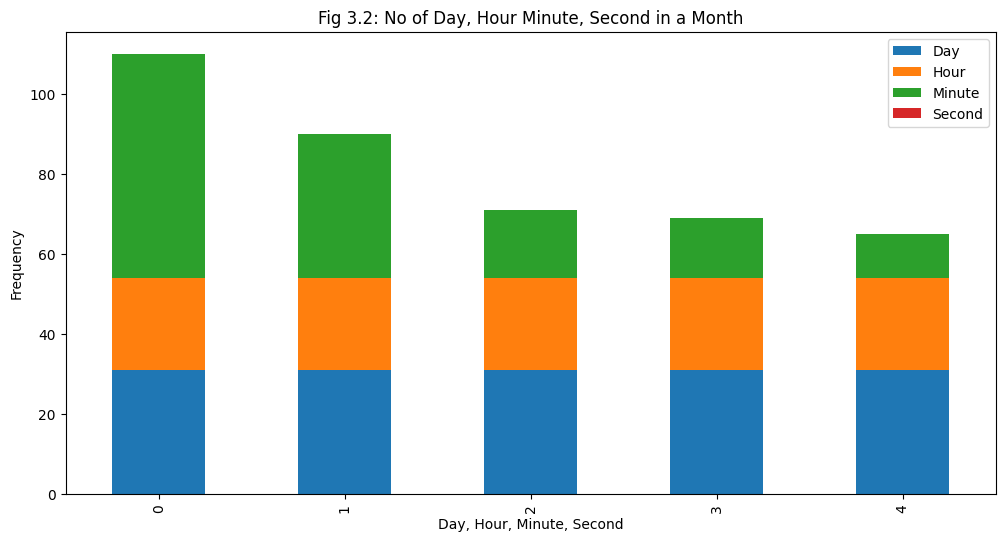

In [76]:
df[["11/33KV Feeder", "Day", "Hour", "Minute", "Second"]].head().plot(kind = "bar",
                                                                      figsize = (12, 6),
                                                                      grid = False,
                                                                      title = "Fig 3.2: No of Day, Hour Minute, Second in a Month",
                                                                      xlabel = "Day, Hour, Minute, Second",
                                                                      ylabel = "Frequency",
                                                                      table = False,
                                                                      stacked = 1<2);

In [77]:
# df.loc[["11/33KV Feeder", "Day", "Hour", "Minute", "Second"]]
df.loc[0:10, ["11/33KV Feeder", "Day", "Hour", "Minute", "Second"]]

,11/33KV Feeder,Day,Hour,Minute,Second
0,11KV UNGUWAN YELWA,31.0,23.0,56.0,0.0
1,11KV FEDERAL HOUSING,31.0,23.0,36.0,0.0
2,33KV GONIN GORA (GWAGWADA LEG),31.0,23.0,17.0,0.0
3,33KV GONIN GORA (GWAGWADA LEG),31.0,23.0,15.0,0.0
4,11KV GWARI AVENUE,31.0,23.0,11.0,0.0
5,11KV FEDERAL HOUSING,31.0,23.0,4.0,0.0
6,11KV GWARI AVENUE,31.0,23.0,2.0,0.0
7,11KV FEDERAL HOUSING,31.0,23.0,1.0,0.0
8,33KV GONIN GORA (GWAGWADA LEG),31.0,22.0,57.0,0.0
9,33KV GONIN GORA (GWAGWADA LEG),31.0,22.0,41.0,0.0


<ipython-input-78-c26e7aaed0f2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Hour").mean()["Amount Paid"].sort_values(ascending = False).plot(kind = "bar")


<Axes: xlabel='Hour'>

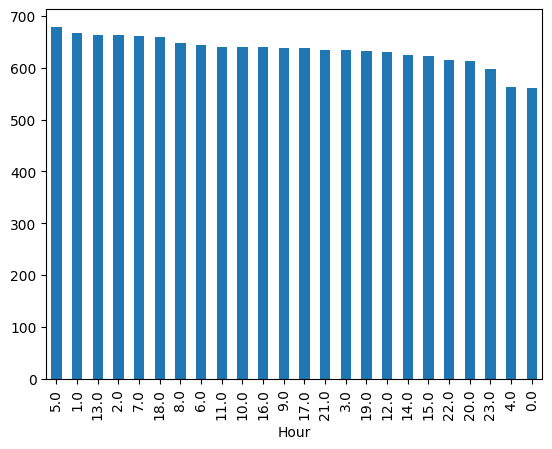

In [78]:
df.groupby("Hour").mean()["Amount Paid"].sort_values(ascending = False).plot(kind = "bar")

#Working with the Titanic Dataset 21st Nov, 2023

In [82]:
import pandas as pd
import seaborn as sns

df_titanic = sns.load_dataset("titanic")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [87]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [88]:
df_titanic[["alive", "who", "age", "pclass", "fare" ]].pivot_table(index = "who", columns = "alive", values = ["age", "fare"], aggfunc = "mean", margins = True)

age                             fare                      
alive         no        yes        All         no        yes        All
who                                                                    
child   7.220588   5.778980   6.369518  32.633703  32.891329  32.785795
man    32.983871  34.069444  33.173123  21.490736  42.076422  26.580053
woman  30.459184  32.446746  32.000000  20.967174  54.813801  50.794037
All    30.626179  28.343690  29.699118  22.965456  51.843205  34.694514

In [89]:
df_titanic[['adult_male', 'who']]

,adult_male,who
0,True,man
1,False,woman
2,False,woman
3,False,woman
4,True,man
...,...,...
886,True,man
887,False,woman
888,False,woman
889,True,man


In [90]:
df_titanic.loc[0:10, :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [91]:
df_titanic['sex'].head(11)

0       male
1     female
2     female
3     female
4       male
5       male
6       male
7       male
8     female
9     female
10    female
Name: sex, dtype: object

In [92]:
df_titanic.loc[0:10, "sex":"class"]

,sex,age,sibsp,parch,fare,embarked,class
0,male,22.0,1,0,7.2500,S,Third
1,female,38.0,1,0,71.2833,C,First
2,female,26.0,0,0,7.9250,S,Third
3,female,35.0,1,0,53.1000,S,First
4,male,35.0,0,0,8.0500,S,Third
5,male,NaN,0,0,8.4583,Q,Third
6,male,54.0,0,0,51.8625,S,First
7,male,2.0,3,1,21.0750,S,Third
8,female,27.0,0,2,11.1333,S,Third
9,female,14.0,1,0,30.0708,C,Second


In [93]:
df_titanic.groupby("class")["sex"].value_counts(normalize = False)

class   sex   
First   male      122
        female     94
Second  male      108
        female     76
Third   male      347
        female    144
Name: sex, dtype: int64

In [94]:
df_titanic["sex"].value_counts(normalize = True)*100

male      64.758698
female    35.241302
Name: sex, dtype: float64

In [95]:
df_titanic.loc[df_titanic["class"] == "First", "sex"].value_counts(normalize = True)*100

male      56.481481
female    43.518519
Name: sex, dtype: float64

In [96]:
df_titanic.loc[df_titanic["class"] == "Second", "sex"].value_counts(normalize = True)*100

male      58.695652
female    41.304348
Name: sex, dtype: float64

In [97]:
df_titanic.loc[df_titanic["class"] == "Third", "sex"].value_counts(normalize = True)*100

male      70.672098
female    29.327902
Name: sex, dtype: float64

##The .iloc Method

In [98]:
df_titanic.iloc[0:4, 0:5]

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1


In [99]:
pd.__version__

'1.5.3'

In [100]:
sns.__version__

'0.12.2'

#UFO DataFrame

## 1. The .loc[] Method

In [101]:
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [102]:
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [103]:
ufo.loc[[0, 1, 2, 3], :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [104]:
ufo.loc[0:3]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [105]:
ufo.loc[0:3, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [106]:
ufo.loc[:, ["City", "State"]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
18236,Grant Park,IL
18237,Spirit Lake,IA
18238,Eagle River,WI
18239,Eagle River,WI


In [107]:
ufo.loc[0:5:, "City":"State"]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND


In [108]:
ufo.head(6).drop(columns ="Time")

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND


In [109]:
ufo_mask = ufo["City"] == "Oakland"
ufo[ufo_mask]

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


In [110]:
ufo.loc[ufo_mask]

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


## 2. The .iloc[] Method

In [111]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [112]:
ufo.iloc[:, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL
18237,Spirit Lake,NaN,DISK,IA
18238,Eagle River,NaN,NaN,WI
18239,Eagle River,RED,LIGHT,WI


In [113]:
ufo.iloc[0:3, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [114]:
ufo.loc[:, ["City", "State"]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
18236,Grant Park,IL
18237,Spirit Lake,IA
18238,Eagle River,WI
18239,Eagle River,WI


In [115]:
ufo[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


## 3. Working with Duplicates

In [116]:
#Reading a dataset of movie reviewers
user_cols = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_table("http://bit.ly/movieusers", sep = "|", header = None, names=user_cols, index_col="user_id")
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [117]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [118]:
users.shape

(943, 4)

In [119]:
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [120]:
users.zip_code.duplicated().value_counts()

False    795
True     148
Name: zip_code, dtype: int64

In [121]:
no_duplicates = users.zip_code.duplicated().sum()
no_duplicates

148

In [122]:
users.duplicated().sum()

7

In [123]:
users.loc[users.duplicated(keep = False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [124]:
users.drop_duplicates(keep = False).shape

(929, 4)

In [125]:
users.duplicated(subset = ["age", "zip_code"]).sum()

16

In [126]:
users.drop_duplicates(subset = ["age", "zip_code"]).shape

(927, 4)

In [127]:
users.shape

(943, 4)